# Model Training

### Setup

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from mahalanobis_distence_method import MahalanobisDistenceMethod

### Read and Split Data

In [3]:
transaction_df = pd.read_csv("data/transactions.csv")#[["address", "label", "to_benfords_second", "from_benfords_second", "to_benfords_first", "from_benfords_first", "in_count", "in_gas_limit_med"]]

In [4]:
train_df, test_df = train_test_split(transaction_df, train_size=0.8, shuffle=True, stratify=transaction_df["label"], random_state=1234)

### Data Exploration

In [5]:
legit_df = train_df[train_df["label"] == 0].drop(columns=["label"])
scam_df = train_df[train_df["label"] == 1].drop(columns=["label"])

In [6]:
legit_df.describe()

,total_count,in_count,in_unique,in_value_avg,in_value_med,in_value_std,in_gas_limit_avg,in_gas_limit_med,in_gas_limit_std,from_benfords_first,...,out_count,out_unique,out_value_avg,out_value_med,out_value_std,out_gas_limit_avg,out_gas_limit_med,out_gas_limit_std,to_benfords_first,to_benfords_second
count,748072.000000,748072.000000,748072.000000,748072.000000,748072.000000,748072.000000,7.480720e+05,7.480720e+05,7.480720e+05,748072.000000,...,748072.000000,748072.000000,748072.000000,748072.000000,748072.000000,7.480720e+05,7.480720e+05,7.480720e+05,748072.000000,748072.000000
mean,10.609662,5.283947,1.428048,0.739568,0.719075,0.286847,1.027917e+05,1.991874e+04,9.992669e+04,3.505913,...,5.325715,1.395161,0.966803,0.883966,0.425547,9.481389e+04,1.894172e+04,9.337039e+04,5.246943,5.327209
std,680.763536,398.291218,67.187495,61.730297,64.952390,32.601660,3.775520e+05,1.789434e+05,3.777109e+05,6.005701,...,353.064119,69.865124,146.871255,144.671197,69.179250,1.835506e+05,1.048414e+05,1.869295e+05,6.442285,6.594294
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000e+04,0.000000e+00,4.796250e+04,0.574798,0.563550
75%,2.000000,2.000000,1.000000,0.035796,0.032725,0.000000,6.300000e+04,0.000000e+00,6.300000e+04,1.738324,...,2.000000,1.000000,0.001356,0.000932,0.000000,1.052750e+05,0.000000e+00,1.000000e+05,13.586729,14.491454
max,404569.000000,172932.000000,9986.000000,35000.000000,35000.000000,13560.191292,1.795264e+07,1.384559e+07,1.795264e+07,15.676941,...,231637.000000,47214.000000,100000.000000,100000.000000,43354.410467,2.850000e+07,2.009964e+07,2.850000e+07,15.676941,14.618840


In [7]:
scam_df.describe()

,total_count,in_count,in_unique,in_value_avg,in_value_med,in_value_std,in_gas_limit_avg,in_gas_limit_med,in_gas_limit_std,from_benfords_first,...,out_count,out_unique,out_value_avg,out_value_med,out_value_std,out_gas_limit_avg,out_gas_limit_med,out_gas_limit_std,to_benfords_first,to_benfords_second
count,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4.710000e+03,4.710000e+03,4.710000e+03,4710.000000,...,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4.710000e+03,4.710000e+03,4.710000e+03,4710.000000,4710.000000
mean,16.407856,8.220170,2.160722,0.295235,0.277913,0.118331,4.425386e+05,1.129234e+05,4.366017e+05,9.508460,...,8.187686,2.115499,0.229856,0.188541,0.170720,1.997720e+05,4.859448e+04,1.929374e+05,10.592497,10.898722
std,273.545783,164.237367,57.868450,1.948743,1.959107,1.148232,1.316225e+06,5.220268e+05,1.347379e+06,6.068934,...,113.046106,53.504136,1.152408,1.304765,1.085636,3.615572e+05,3.038055e+05,3.734714e+05,5.361766,5.925650
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.003397,0.002997,0.000000,5.582400e+04,0.000000e+00,5.343725e+04,0.574798,...,2.000000,1.000000,0.000000,0.000000,0.000000,1.061463e+05,0.000000e+00,1.000000e+05,12.821304,6.522149
50%,4.000000,2.000000,1.000000,0.032967,0.029016,0.000000,1.750000e+05,0.000000e+00,1.595525e+05,13.586729,...,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,13.586729,14.448731
75%,6.000000,2.000000,1.000000,0.121211,0.108435,0.000682,2.000000e+05,0.000000e+00,2.000000e+05,13.586729,...,4.000000,1.000000,0.012865,0.003050,0.000000,2.000000e+05,2.391703e+04,2.000000e+05,13.586729,14.448731
max,16188.000000,10074.000000,3857.000000,98.109183,98.109183,66.017469,7.600027e+06,5.324689e+06,7.600027e+06,15.676941,...,6114.000000,3634.000000,42.666667,64.000000,36.950417,7.600027e+06,5.327276e+06,7.600027e+06,15.676941,14.555292


In [8]:
trans_corr = train_df.corr()
legit_corr = legit_df.corr()
scam_corr = scam_df.corr()

abs_corr_dif = np.abs(legit_corr - scam_corr)

In [9]:
print(f"Feature Correlation with Label:\n{trans_corr['label']}")

Feature Correlation with Label:
label                   1.000000
total_count             0.000673
in_count                0.000583
in_unique               0.000861
in_value_avg           -0.000569
in_value_med           -0.000537
in_value_std           -0.000409
in_gas_limit_avg        0.068443
in_gas_limit_med        0.040021
in_gas_limit_std        0.067686
from_benfords_first     0.078562
from_benfords_second    0.101905
out_count               0.000641
out_unique              0.000814
out_value_avg          -0.000397
out_value_med          -0.000380
out_value_std          -0.000291
out_gas_limit_avg       0.044644
out_gas_limit_med       0.021798
out_gas_limit_std       0.041577
to_benfords_first       0.065351
to_benfords_second      0.066515
Name: label, dtype: float64


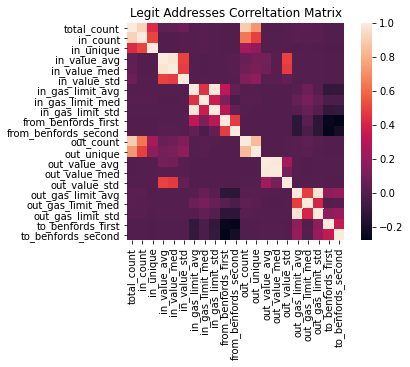

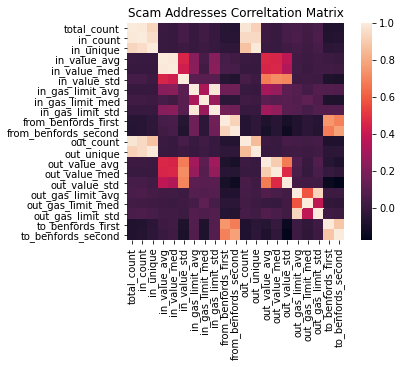

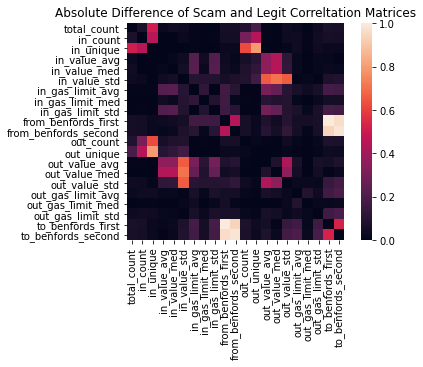

In [10]:
sns.heatmap(legit_corr, xticklabels=True, yticklabels=True, square=True)
plt.title("Legit Addresses Correltation Matrix")
plt.show()

sns.heatmap(scam_corr, xticklabels=True, yticklabels=True, square=True)
plt.title("Scam Addresses Correltation Matrix")
plt.show()

sns.heatmap(abs_corr_dif, xticklabels=True, yticklabels=True, square=True)
plt.title("Absolute Difference of Scam and Legit Correltation Matrices")
plt.show()

### Feature Selection

In [11]:
rows, columns = np.where(abs_corr_dif >= 0.75)

In [12]:
rows = np.unique(rows)
columns = np.unique(columns)

In [13]:
rows = abs_corr_dif.axes[0][rows]
columns = abs_corr_dif.axes[1][columns]

In [14]:
feature_list = np.union1d(rows, columns).tolist()

In [15]:
train_df = train_df[["address", "label"] + feature_list]
test_df = test_df[["address", "label"] + feature_list]

In [16]:
train_df.columns.to_list()

['address',
 'label',
 'from_benfords_first',
 'from_benfords_second',
 'in_unique',
 'out_unique',
 'to_benfords_first',
 'to_benfords_second']

### Constructing Dataset and Centered and Scaled

In [17]:
train_addr = train_df["address"].to_numpy()
y_train = train_df["label"].to_numpy()
X_train = train_df.drop(columns=["address", "label"]).to_numpy()

test_addr = test_df["address"].to_numpy()
y_test = test_df["label"].to_numpy()
X_test = test_df.drop(columns=["address", "label"]).to_numpy()

In [18]:
ss = StandardScaler().fit(X_train)

In [19]:
print("Standard Scalar Mean:", ss.mean_.tolist(), end="\n")
print("Standard Scalar STD:", ss.scale_.tolist())

Standard Scalar Mean: [3.5434692067655664, 2.817430869331877, 1.4326325549760754, 1.3996681642228428, 5.280388884721533, 5.362069063704834]
Standard Scalar STD: [6.02471166576313, 5.50009675574053, 67.13315638506003, 69.77463397633515, 6.4498689934253814, 6.604940778259221]


In [20]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

### Train Model and Set Classification Threshold

In [21]:
MDM = MahalanobisDistenceMethod(epsilon=0.03)
MDM.fit(X_train)

In [22]:
results = MDM.evaluate(X_train, y_train)

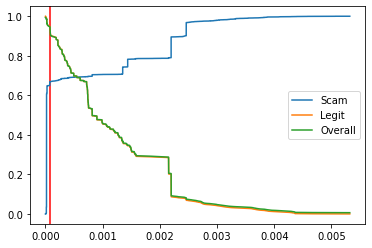

In [23]:
eps = 0
for i, (s_acc, l_acc) in enumerate(zip(results["scam_accuracy"], results["legit_accuracy"])):
    if s_acc+0.3 >= l_acc:
        eps = results["epsilon"][i]
        MDM.set_epsilon(eps)
        plt.axvline(eps, color="red")
        break
        
plt.plot(results["epsilon"], results["scam_accuracy"], label="Scam")
plt.plot(results["epsilon"], results["legit_accuracy"], label="Legit")
plt.plot(results["epsilon"], results["accuracy"], label="Overall")
plt.legend()
plt.show()

In [24]:
eps = results["epsilon"][np.argmax(results["f1-score"])-1]

### Evaluate Training Set 

In [25]:
y_pred = MDM.classify(X_train)

In [26]:
y_scam = y_pred[np.where(y_train==1)]
y_legit = y_pred[np.where(y_train==0)]

In [27]:
acc = np.sum(y_pred == y_train) / len(y_train)
scam_acc = np.sum(y_scam == y_train[np.where(y_train==1)]) / len(y_scam)
legit_acc = np.sum(y_legit == y_train[np.where(y_train==0)]) / len(y_legit)

In [28]:
print(f"Training Accuracy: {acc:.4f}% | Legit Accuracy: {legit_acc:.4f}% | Scam Accuracy: {scam_acc:.4f}%")

Training Accuracy: 0.9465% | Legit Accuracy: 0.9482% | Scam Accuracy: 0.6684%


### Evaluate Testing Set

In [29]:
y_pred = MDM.classify(X_test)

In [30]:
y_scam = y_pred[np.where(y_test==1)]
y_legit = y_pred[np.where(y_test==0)]

In [31]:
acc = np.sum(y_pred == y_test) / len(y_test)
scam_acc = np.sum(y_scam == y_test[np.where(y_test==1)]) / len(y_scam)
legit_acc = np.sum(y_legit == y_test[np.where(y_test==0)]) / len(y_legit)

In [32]:
print(f"Training Accuracy: {acc:.4f}% | Legit Accuracy: {legit_acc:.4f}% | Scam Accuracy: {scam_acc:.4f}%")

Training Accuracy: 0.9461% | Legit Accuracy: 0.9479% | Scam Accuracy: 0.6678%


In [33]:
mu, sigma = MDM.parameters()

In [34]:
print(f"mu:\n{mu}")

mu:
[-1.94441158e-17 -2.07466827e-16 -6.26742372e-18  1.79338932e-19
  7.09804614e-18  9.23123554e-18]


In [35]:
print(f"sigma:\n{sigma}")

sigma:
[[ 1.00000133  0.4878316  -0.00247547 -0.00412757 -0.24490266 -0.26584776]
 [ 0.4878316   1.00000133 -0.00212154 -0.00438301 -0.25067646 -0.19306424]
 [-0.00247547 -0.00212154  1.00000133  0.1912427  -0.01111871 -0.0107348 ]
 [-0.00412757 -0.00438301  0.1912427   1.00000133 -0.00195359 -0.00290502]
 [-0.24490266 -0.25067646 -0.01111871 -0.00195359  1.00000133  0.35563932]
 [-0.26584776 -0.19306424 -0.0107348  -0.00290502  0.35563932  1.00000133]]
